In [1]:
import sys
sys.path.append("/home/lucas/Documents/Proyecto_Integrador/PI")
from paralelepipedo import *
import kdsource as kds
import kdsource.histograms as kdh

path = "/home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25"
if not os.path.exists(path):
    os.makedirs(path)
os.chdir(path)

# Datos

In [10]:
sim_0 = SimulationConfig(
    geometria=[True, 15, 15, 300, 3, 3],
    z0=0,
    z_track=30,
    fuente=["monoenergetica", "colimada"],
    z_for_spectral_tally=[15, 30],
    num_particles=int(2e4),
    folder=path + "/sim_0/",
    WW=True,
    statepoint_name="statepoint_0.h5",
    trackfile_name="trackfile_0.h5",
)

sam_0 = SamplingConfig(
    columns_order=["ln(E0/E)", "x", "y", "mu", "phi"],
    micro_bins=[500] * 5,
    macro_bins=[10, 8, 8, 7],
    binning_type="equal_bins",
    user_defined_edges=[
        [2.995732273553991 + 1e-9],
        None,
        [-1.5, 1.5],
        [-1.5, 1.5],
        [1 - 1e-9],
        None,
    ],
    folder=path + "/sim_0/",
    surface_track_path=sim_0.folder + sim_0.trackfile_name,
    output_name="source_0.xml",
    trackfile_resampled_name=sim_0.trackfile_name.replace(".h5", "_resampled"),
    num_resampling=int(2e4),
)

sim_1 = SimulationConfig(
    geometria=[True, 15, 15, 300, 3, 3],
    z0=30,
    z_track=60,
    fuente=[
        "/home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_0/trackfile_0_resampled.h5"
    ],
    z_for_spectral_tally=[45, 60],
    num_particles=int(2e4),
    folder=path + "/sim_1/",
    WW=True,
    statepoint_name="statepoint_1.h5",
    trackfile_name="trackfile_1.h5",
)

sam_1 = SamplingConfig(
    columns_order=["ln(E0/E)", "x", "y", "mu", "phi"],
    micro_bins=[500] * 5,
    macro_bins=[10, 8, 8, 7],
    binning_type="equal_bins",
    user_defined_edges=[
        [2.995732273553991 + 1e-9],
        None,
        [-1.5, 1.5],
        [-1.5, 1.5],
        [1 - 1e-9],
        None,
    ],
    folder=path + "/sim_1/",
    surface_track_path=sim_1.folder + sim_1.trackfile_name,
    output_name="source_1.xml",
    trackfile_resampled_name=sim_1.trackfile_name.replace(".h5", "_resampled"),
    num_resampling=int(2e4),
)

sim_2 = SimulationConfig(
    geometria=[True, 15, 15, 300, 3, 3],
    z0=60,
    z_track=90,
    fuente=[
        "/home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_1/trackfile_1_resampled.h5"
    ],
    z_for_spectral_tally=[75, 90],
    num_particles=int(2e4),
    folder=path + "/sim_2/",
    WW=True,
    statepoint_name="statepoint_12.h5",
    trackfile_name="trackfile_2.h5",
)

# Simulación 0 entre z=0cm y z=30cm

In [4]:
run_simulation(sim_0)

/home/lucas/anaconda3/envs/openmc_develop/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=4.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

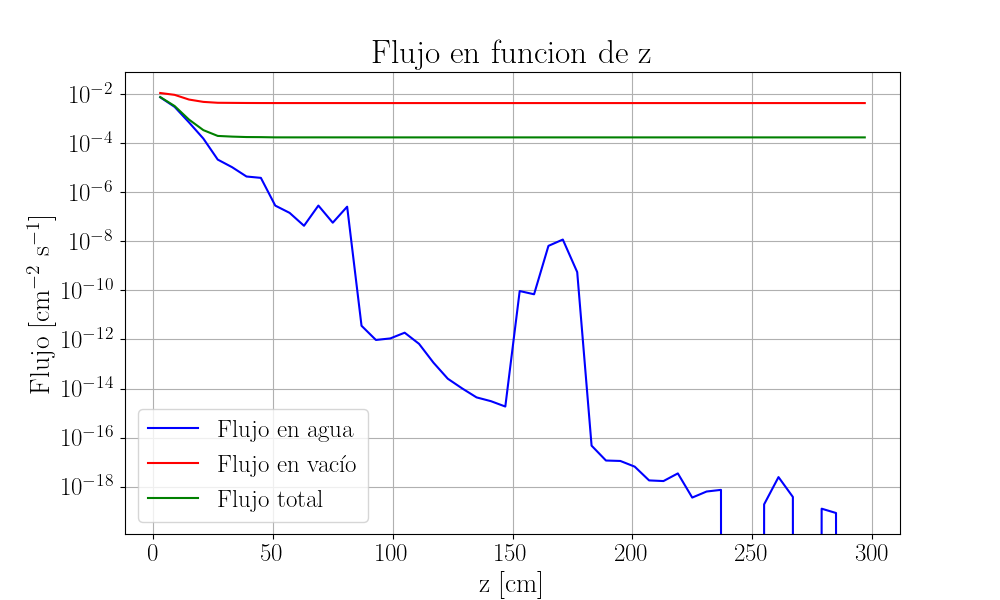

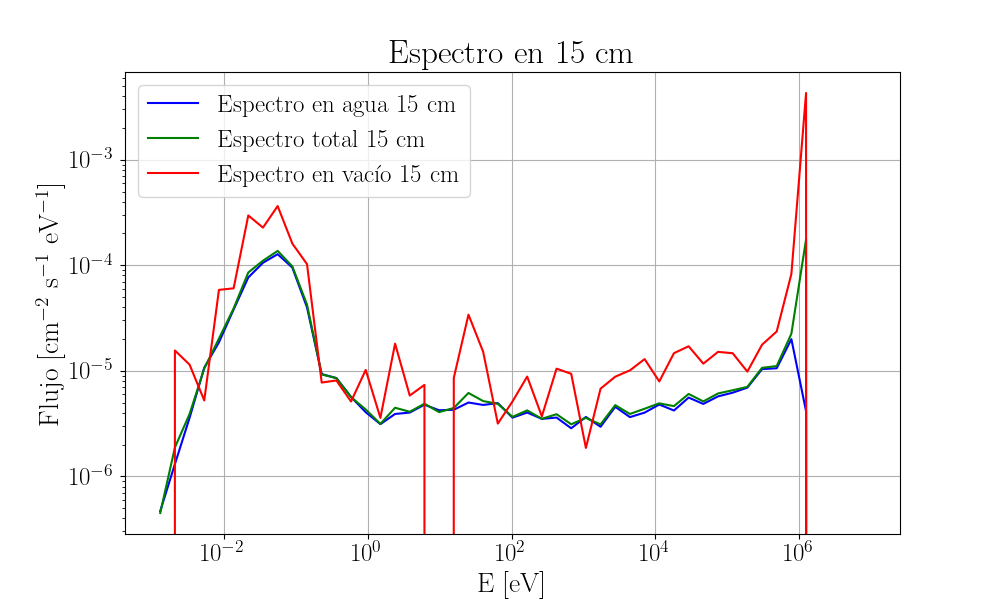

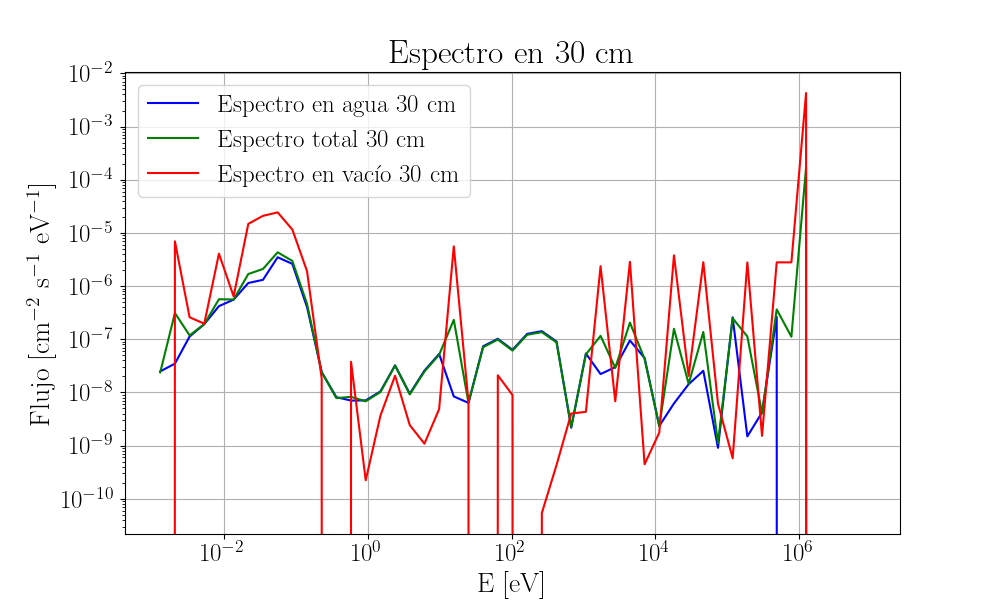

In [5]:
# %matplotlib widget
df_flux_total = tally_flux_2_df(
    sim_0.folder + sim_0.statepoint_name,
    tally_name="flux_total",
)
df_flux_vacio = tally_flux_2_df(
    sim_0.folder + sim_0.statepoint_name,
    tally_name="flux_vacio",
)
df_flux_agua = get_tally_agua(df_flux_total, df_flux_vacio)
plot_flux(
    df_flux_agua,
    df_flux_vacio,
    df_flux_total,
)


df_espectro_total_50cm = tally_espectro_2_df(
    sim_0.folder + sim_0.statepoint_name,
    tally_name=f"espectro_total_{sim_0.z_for_spectral_tally[0]}cm",
)
df_espectro_vacio_50cm = tally_espectro_2_df(
    sim_0.folder + sim_0.statepoint_name,
    tally_name=f"espectro_vacio_{sim_0.z_for_spectral_tally[0]}cm",
)
df_espectro_agua_50cm = get_tally_agua(df_espectro_total_50cm, df_espectro_vacio_50cm)
plot_espectro(
    df_espectro_agua_50cm,
    df_espectro_vacio_50cm,
    df_espectro_total_50cm,
    z=sim_0.z_for_spectral_tally[0],
)


df_espectro_total_100cm = tally_espectro_2_df(
    sim_0.folder + sim_0.statepoint_name,
    tally_name=f"espectro_total_{sim_0.z_for_spectral_tally[1]}cm",
)
df_espectro_vacio_100cm = tally_espectro_2_df(
    sim_0.folder + sim_0.statepoint_name,
    tally_name=f"espectro_vacio_{sim_0.z_for_spectral_tally[1]}cm",
)
df_espectro_agua_100cm = get_tally_agua(
    df_espectro_total_100cm, df_espectro_vacio_100cm
)
plot_espectro(
    df_espectro_agua_100cm,
    df_espectro_vacio_100cm,
    df_espectro_total_100cm,
    z=sim_0.z_for_spectral_tally[1],
)

# Resampleo en z=30cm

/home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_0/trackfile_0.h5
Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_0/trackfile_0.h5: 344140
100% n, 0% g, 0% e-, 0% e+, 0% p, 

    ╔══════════════════════════════════════╗
    ║       Partículas Registradas         ║
    ╠══════════════════════════════════════╣
    ║ Total         : 3.4e+03              ║
    ║ mu = 1 (%)    : 22.55%               ║
    ╚══════════════════════════════════════╝
    


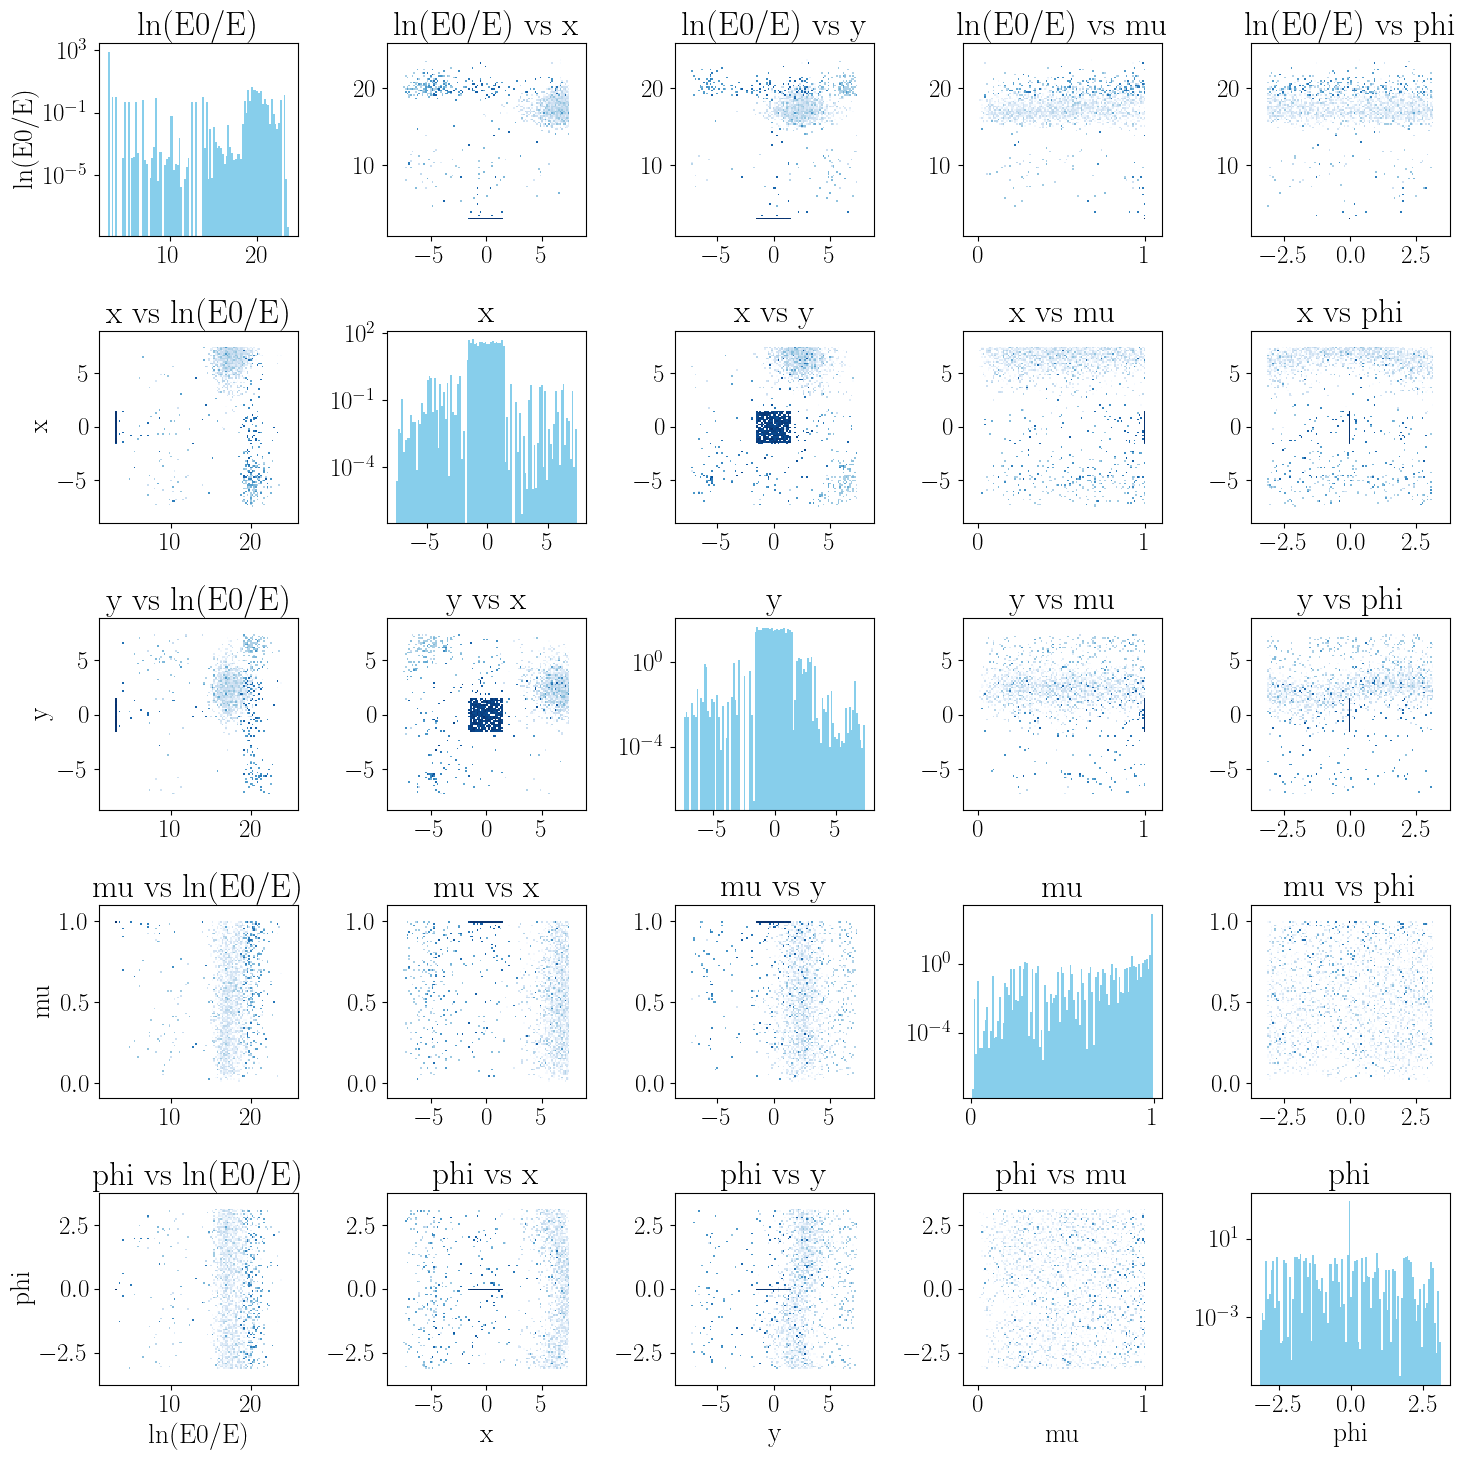

In [5]:
generate_xml(sam_0, sim_0)

In [6]:
resample(path, sam_0)

Geometria: 1.000000, 15.000000, 15.000000, 300.000000, 3.000000, 3.000000
z0: 30.000000
N_original: 20000
fuente_original: monoenergetica, colimada
columns_order: ln(E0/E), x, y, mu, phi
micro_bins: 500, 500, 500, 500, 500
macro_bins: 10, 8, 8, 7
binning_type: equal_bins
used_defined_edges: [2.995732274553991], None, [-1.5, 1.5], [-1.5, 1.5], [0.999999999], None
factor_normalizacion: 0.040075
MCPL: Attempting to compress file trackfile_0_resampled.mcpl with gzip
MCPL: Succesfully compressed file into trackfile_0_resampled.mcpl.gz
Successfully sampled 20000 particles.
Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_0/trackfile_0_resampled.mcpl.gz: 20000
100% n, 0% g, 0% e-, 0% e+, 0% p, 
Saving into OpenMC format (HDF5)
Done, saved into /home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_0/trackfile_0_resampled.h5 file


/home/lucas/anaconda3/envs/openmc_develop/lib/python3.10/site-packages/kdsource/surfsource.py:422: RuntimeWarning: divide by zero encountered in log10
  df["log(t)"] = np.log10(df["t"].to_numpy())


In [ ]:
surface = kdh.SurfaceTrackProcessor("/home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-25-25/inutil/sim_0_WW/surface_source.h5",1).df

# Simulación 1 entre z=30cm y z=60cm

In [3]:
run_simulation(sim_1)

/home/lucas/anaconda3/envs/openmc_develop/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=4.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

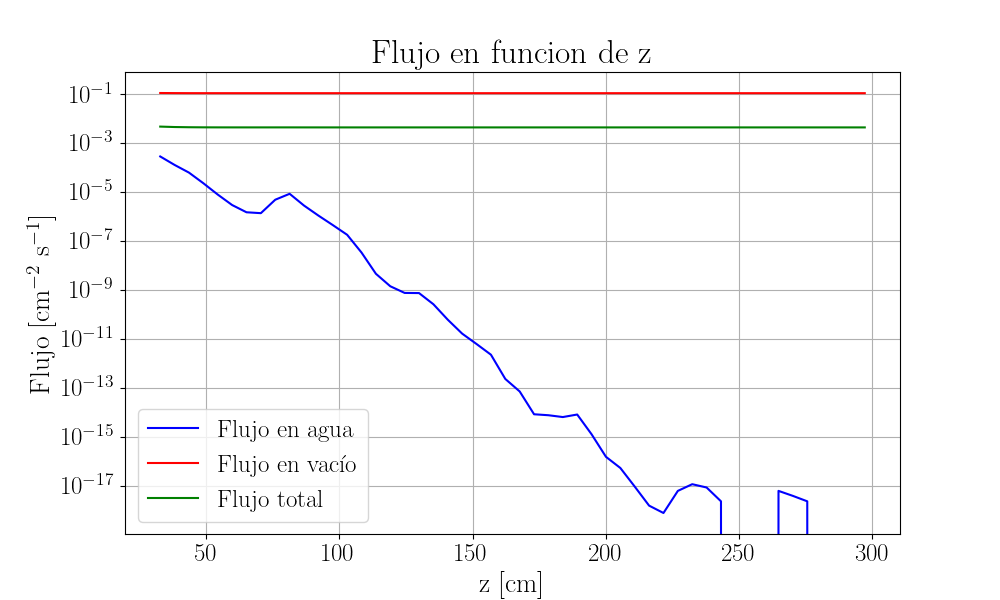

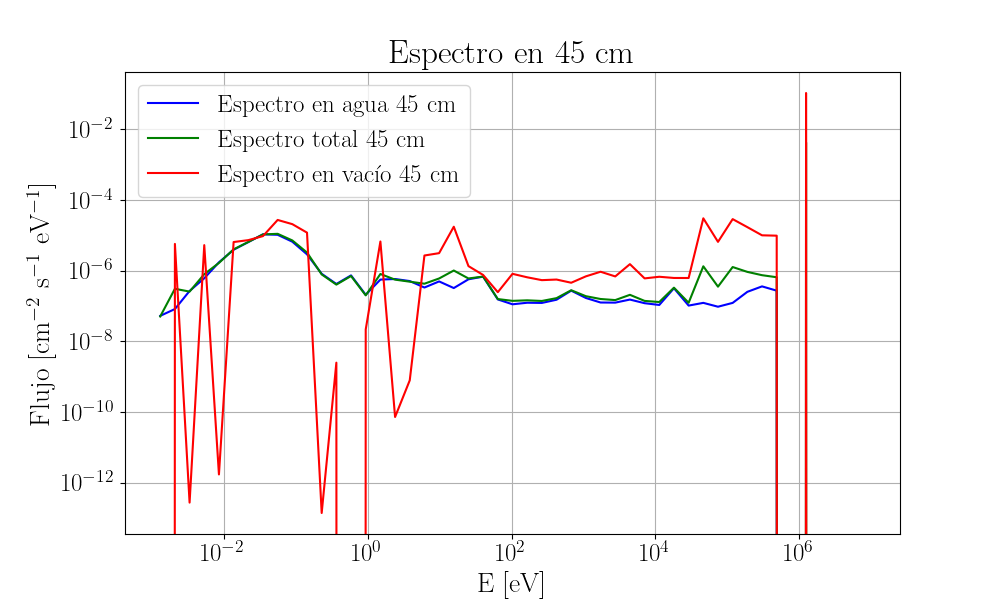

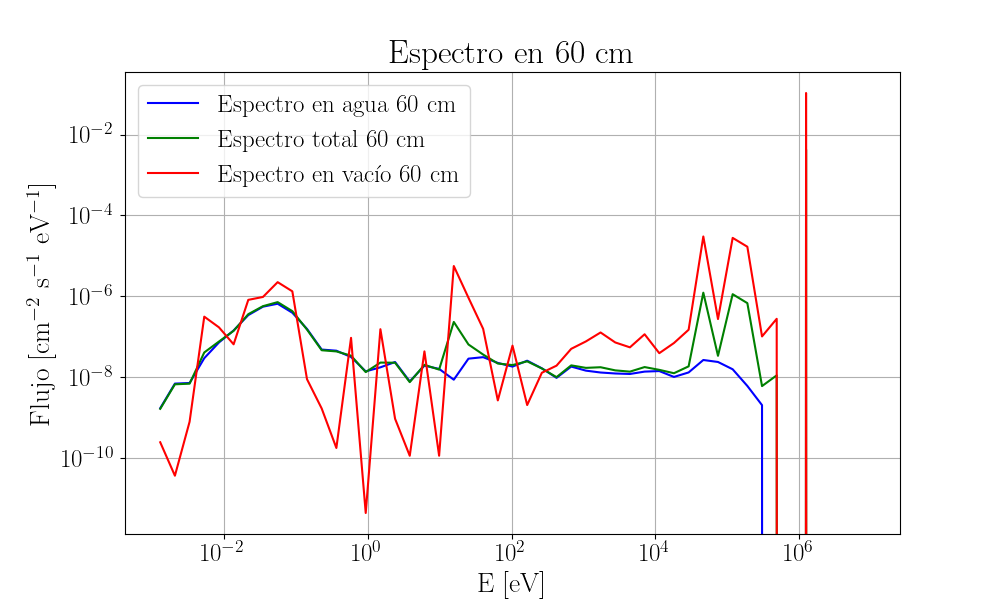

In [5]:
%matplotlib widget
df_flux_total = tally_flux_2_df(
    sim_1.folder + sim_1.statepoint_name,
    tally_name="flux_total",
)
df_flux_vacio = tally_flux_2_df(
    sim_1.folder + sim_1.statepoint_name,
    tally_name="flux_vacio",
)
df_flux_agua = get_tally_agua(df_flux_total, df_flux_vacio)
plot_flux(
    df_flux_agua,
    df_flux_vacio,
    df_flux_total,
)


df_espectro_total_150cm = tally_espectro_2_df(
    sim_1.folder + sim_1.statepoint_name,
    tally_name=f"espectro_total_{sim_1.z_for_spectral_tally[0]}cm",
)
df_espectro_vacio_150cm = tally_espectro_2_df(
    sim_1.folder + sim_1.statepoint_name,
    tally_name=f"espectro_vacio_{sim_1.z_for_spectral_tally[0]}cm",
)
df_espectro_agua_150cm = get_tally_agua(
    df_espectro_total_150cm, df_espectro_vacio_150cm
)
plot_espectro(
    df_espectro_agua_150cm,
    df_espectro_vacio_150cm,
    df_espectro_total_150cm,
    z=sim_1.z_for_spectral_tally[0],
)


df_espectro_total_200cm = tally_espectro_2_df(
    sim_1.folder + sim_1.statepoint_name,
    tally_name=f"espectro_total_{sim_1.z_for_spectral_tally[1]}cm",
)
df_espectro_vacio_200cm = tally_espectro_2_df(
    sim_1.folder + sim_1.statepoint_name,
    tally_name=f"espectro_vacio_{sim_1.z_for_spectral_tally[1]}cm",
)
df_espectro_agua_200cm = get_tally_agua(
    df_espectro_total_200cm, df_espectro_vacio_200cm
)
plot_espectro(
    df_espectro_agua_200cm,
    df_espectro_vacio_200cm,
    df_espectro_total_200cm,
    z=sim_1.z_for_spectral_tally[1],
)

In [6]:
import kdsource as kds

# surface = kds.SurfaceSourceFile("/home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-25-25/sim_1_WW/trackfile_1_WW.h5")
surface = kds.SurfaceSourceFile(
    "/home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_1/trackfile_1.h5"
)._df

Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_1/trackfile_1.h5: 3317087
100% n, 0% g, 0% e-, 0% e+, 0% p, 


# Resampleo en z=60cm

# Simulación 3 entre z=60cm y z=90cm

In [11]:
run_simulation(sim_2)

/home/lucas/anaconda3/envs/openmc_develop/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Surface instance already exists with id=70.
  warn(msg, IDWarning)
/home/lucas/anaconda3/envs/openmc_develop/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=16.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

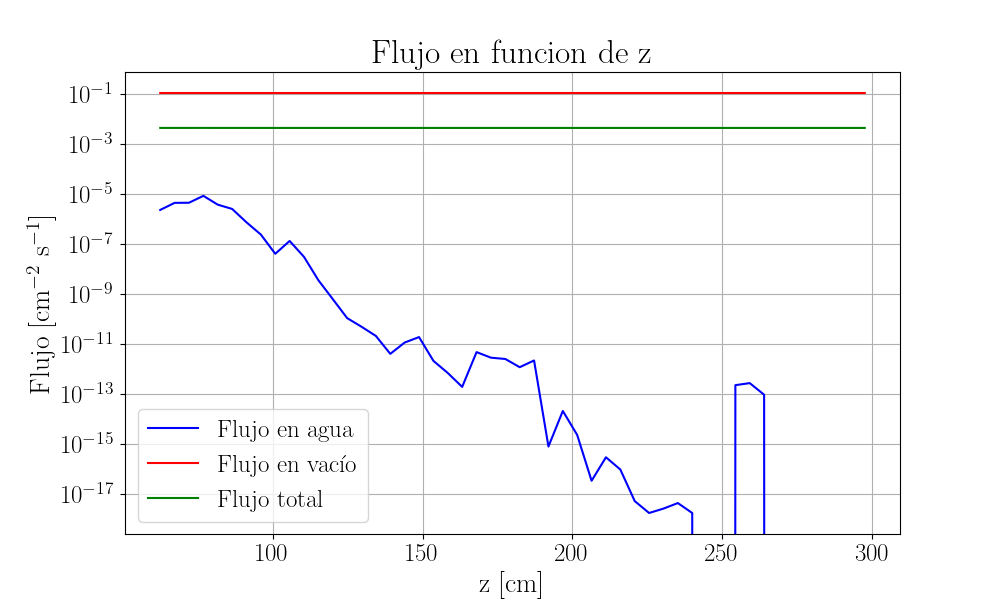

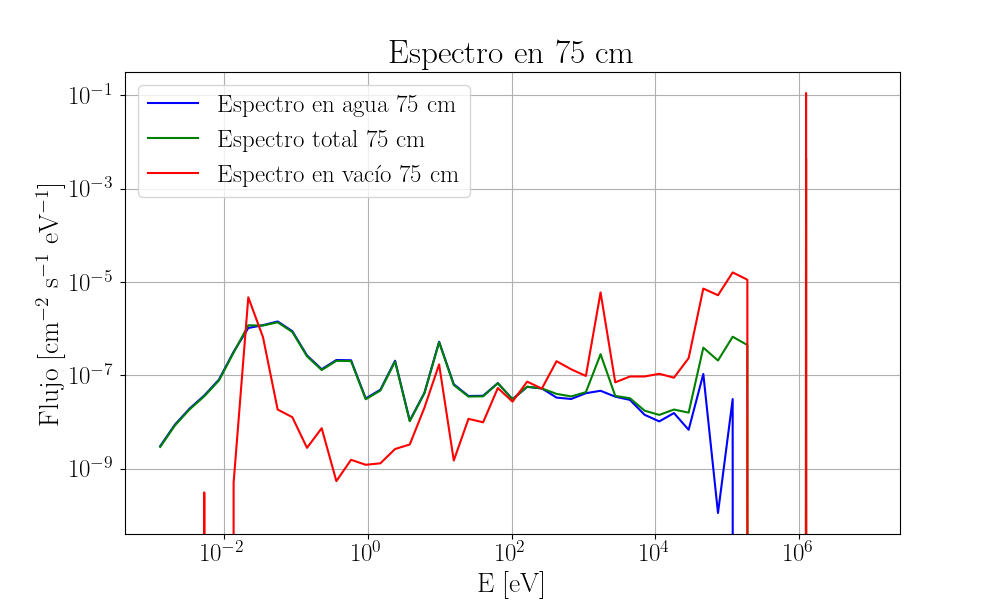

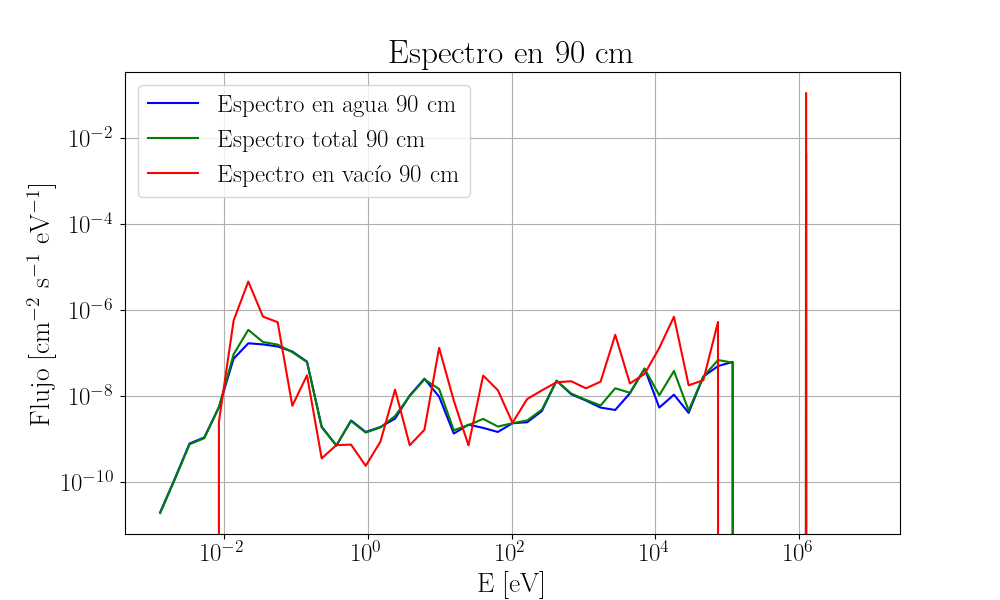

In [13]:
# %matplotlib widget
df_flux_total = tally_flux_2_df(
    sim_2.folder + sim_2.statepoint_name,
    tally_name="flux_total",
)
df_flux_vacio = tally_flux_2_df(
    sim_2.folder + sim_2.statepoint_name,
    tally_name="flux_vacio",
)
df_flux_agua = get_tally_agua(df_flux_total, df_flux_vacio)
plot_flux(
    df_flux_agua,
    df_flux_vacio,
    df_flux_total,
)


df_espectro_total_75cm = tally_espectro_2_df(
    sim_2.folder + sim_2.statepoint_name,
    tally_name=f"espectro_total_{sim_2.z_for_spectral_tally[0]}cm",
)
df_espectro_vacio_75cm = tally_espectro_2_df(
    sim_2.folder + sim_2.statepoint_name,
    tally_name=f"espectro_vacio_{sim_2.z_for_spectral_tally[0]}cm",
)
df_espectro_agua_75cm = get_tally_agua(
    df_espectro_total_75cm, df_espectro_vacio_75cm
)
plot_espectro(
    df_espectro_agua_75cm,
    df_espectro_vacio_75cm,
    df_espectro_total_75cm,
    z=sim_2.z_for_spectral_tally[0],
)


df_espectro_total_90cm = tally_espectro_2_df(
    sim_2.folder + sim_2.statepoint_name,
    tally_name=f"espectro_total_{sim_2.z_for_spectral_tally[1]}cm",
)
df_espectro_vacio_90cm = tally_espectro_2_df(
    sim_2.folder + sim_2.statepoint_name,
    tally_name=f"espectro_vacio_{sim_2.z_for_spectral_tally[1]}cm",
)
df_espectro_agua_90cm = get_tally_agua(
    df_espectro_total_90cm, df_espectro_vacio_90cm
)
plot_espectro(
    df_espectro_agua_90cm,
    df_espectro_vacio_90cm,
    df_espectro_total_90cm,
    z=sim_2.z_for_spectral_tally[1],
)

In [ ]:
import kdsource as kds

# surface = kds.SurfaceSourceFile("/home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-25-25/sim_1_WW/trackfile_1_WW.h5")
surface = kds.SurfaceSourceFile(
    "/home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_1/trackfile_1.h5"
)._df

Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_1/trackfile_1.h5: 3317087
100% n, 0% g, 0% e-, 0% e+, 0% p, 


# Resampleo en z=200cm

/home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_1/trackfile_1.h5
Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_1/trackfile_1.h5: 3317087
100% n, 0% g, 0% e-, 0% e+, 0% p, 

    ╔══════════════════════════════════════╗
    ║       Partículas Registradas         ║
    ╠══════════════════════════════════════╣
    ║ Total         : 1.8e+06              ║
    ║ mu = 1 (%)    : 1.08%               ║
    ╚══════════════════════════════════════╝
    


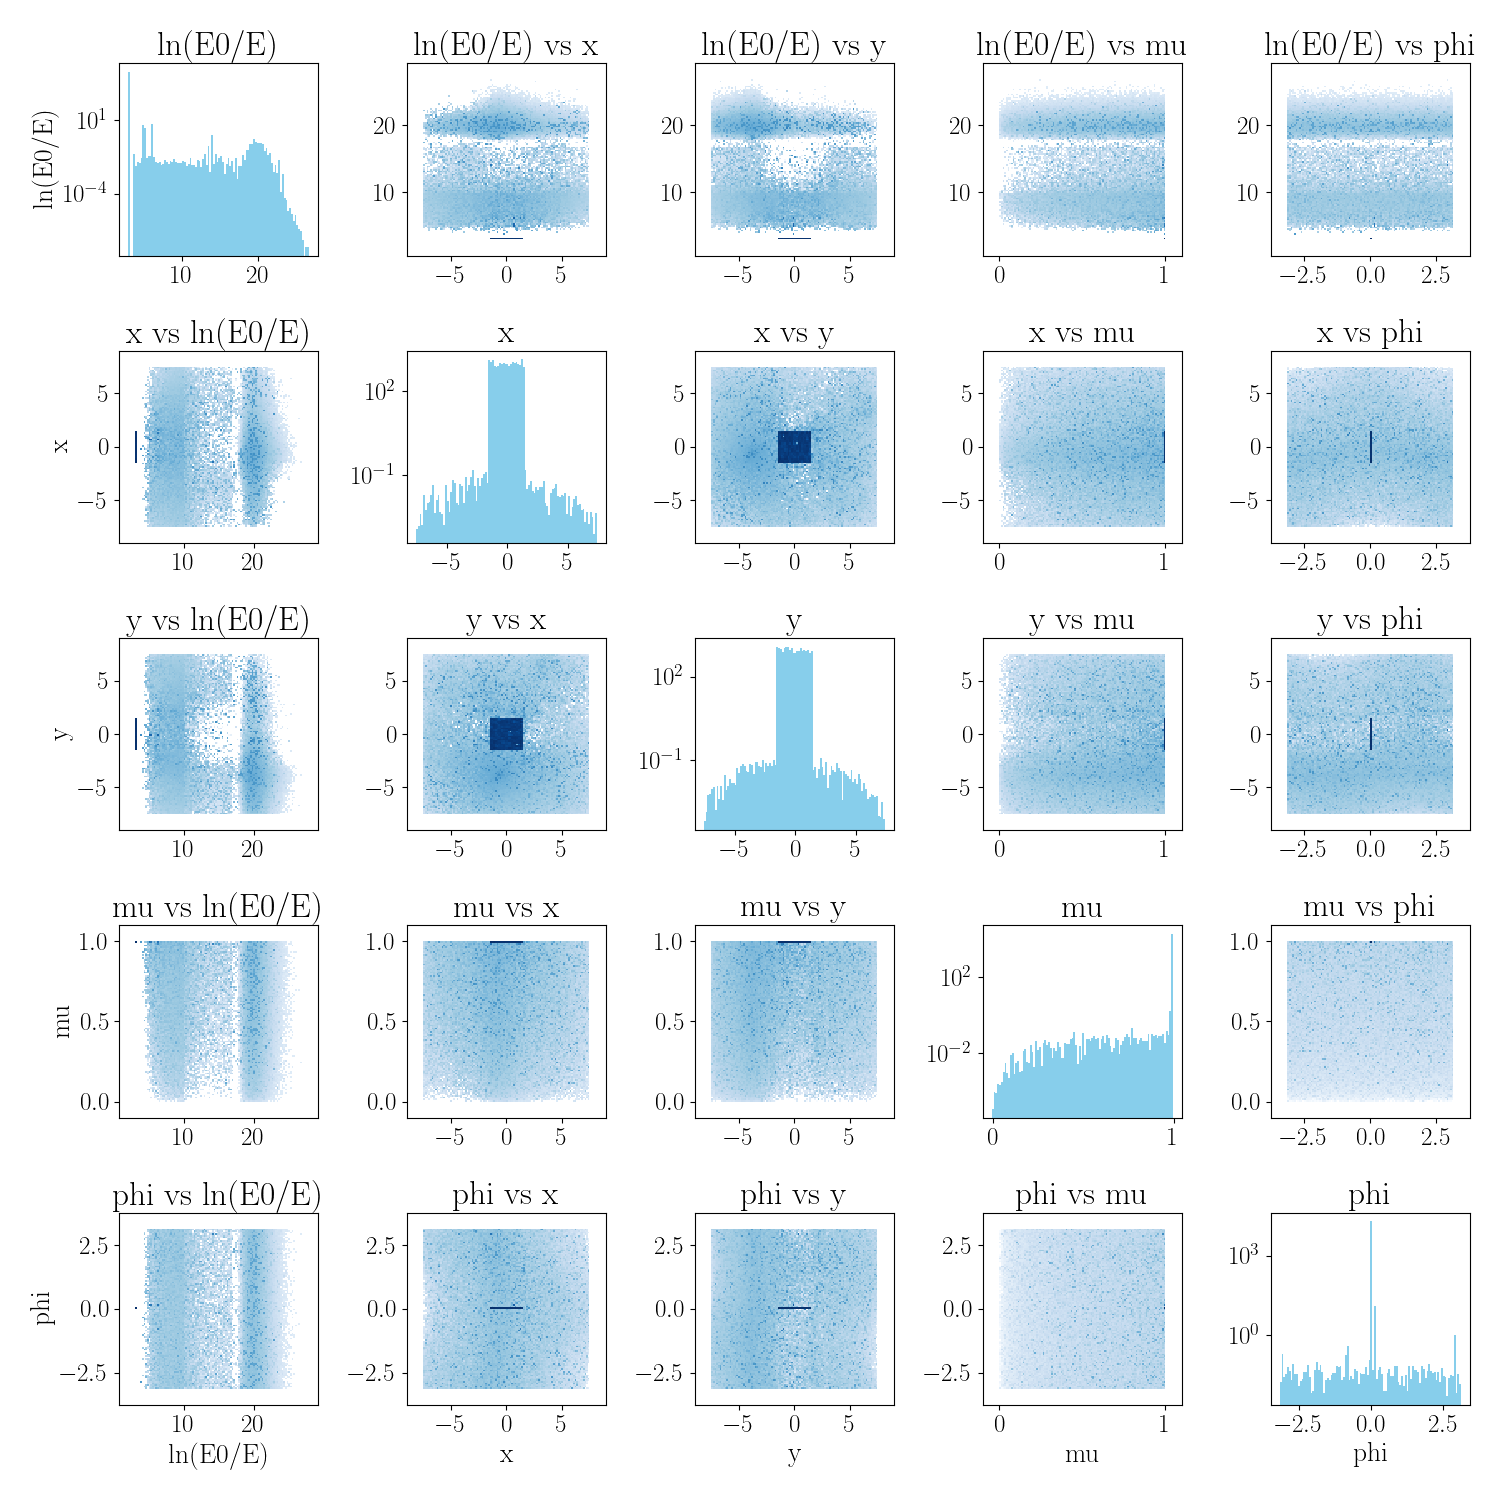

In [ ]:
generate_xml(sam_1, sim_1)

In [ ]:
resample(path, sam_1)

Geometria: 1.000000, 15.000000, 15.000000, 300.000000, 3.000000, 3.000000
z0: 60.000000
N_original: 20000
fuente_original: /home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_0/trackfile_0_resampled.h5
columns_order: ln(E0/E), x, y, mu, phi
micro_bins: 500, 500, 500, 500, 500
macro_bins: 10, 8, 8, 7
binning_type: equal_bins
used_defined_edges: [2.995732274553991], None, [-1.5, 1.5], [-1.5, 1.5], [0.999999999], None
factor_normalizacion: 0.960332
MCPL: Attempting to compress file trackfile_1_resampled.mcpl with gzip
MCPL: Succesfully compressed file into trackfile_1_resampled.mcpl.gz
Successfully sampled 20000 particles.
Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_1/trackfile_1_resampled.mcpl.gz: 20000
100% n, 0% g, 0% e-, 0% e+, 0% p, 
Saving into OpenMC format (HDF5)
Done, saved into /home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_1/trackfile_1_resampled.h5 file


/home/lucas/anaconda3/envs/openmc_develop/lib/python3.10/site-packages/kdsource/surfsource.py:422: RuntimeWarning: divide by zero encountered in log10
  df["log(t)"] = np.log10(df["t"].to_numpy())


/home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_1/trackfile_1.h5
Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_1/trackfile_1.h5: 3317087
100% n, 0% g, 0% e-, 0% e+, 0% p, 

    ╔══════════════════════════════════════╗
    ║       Partículas Registradas         ║
    ╠══════════════════════════════════════╣
    ║ Total         : 1.8e+06              ║
    ║ mu = 1 (%)    : 1.08%               ║
    ╚══════════════════════════════════════╝
    


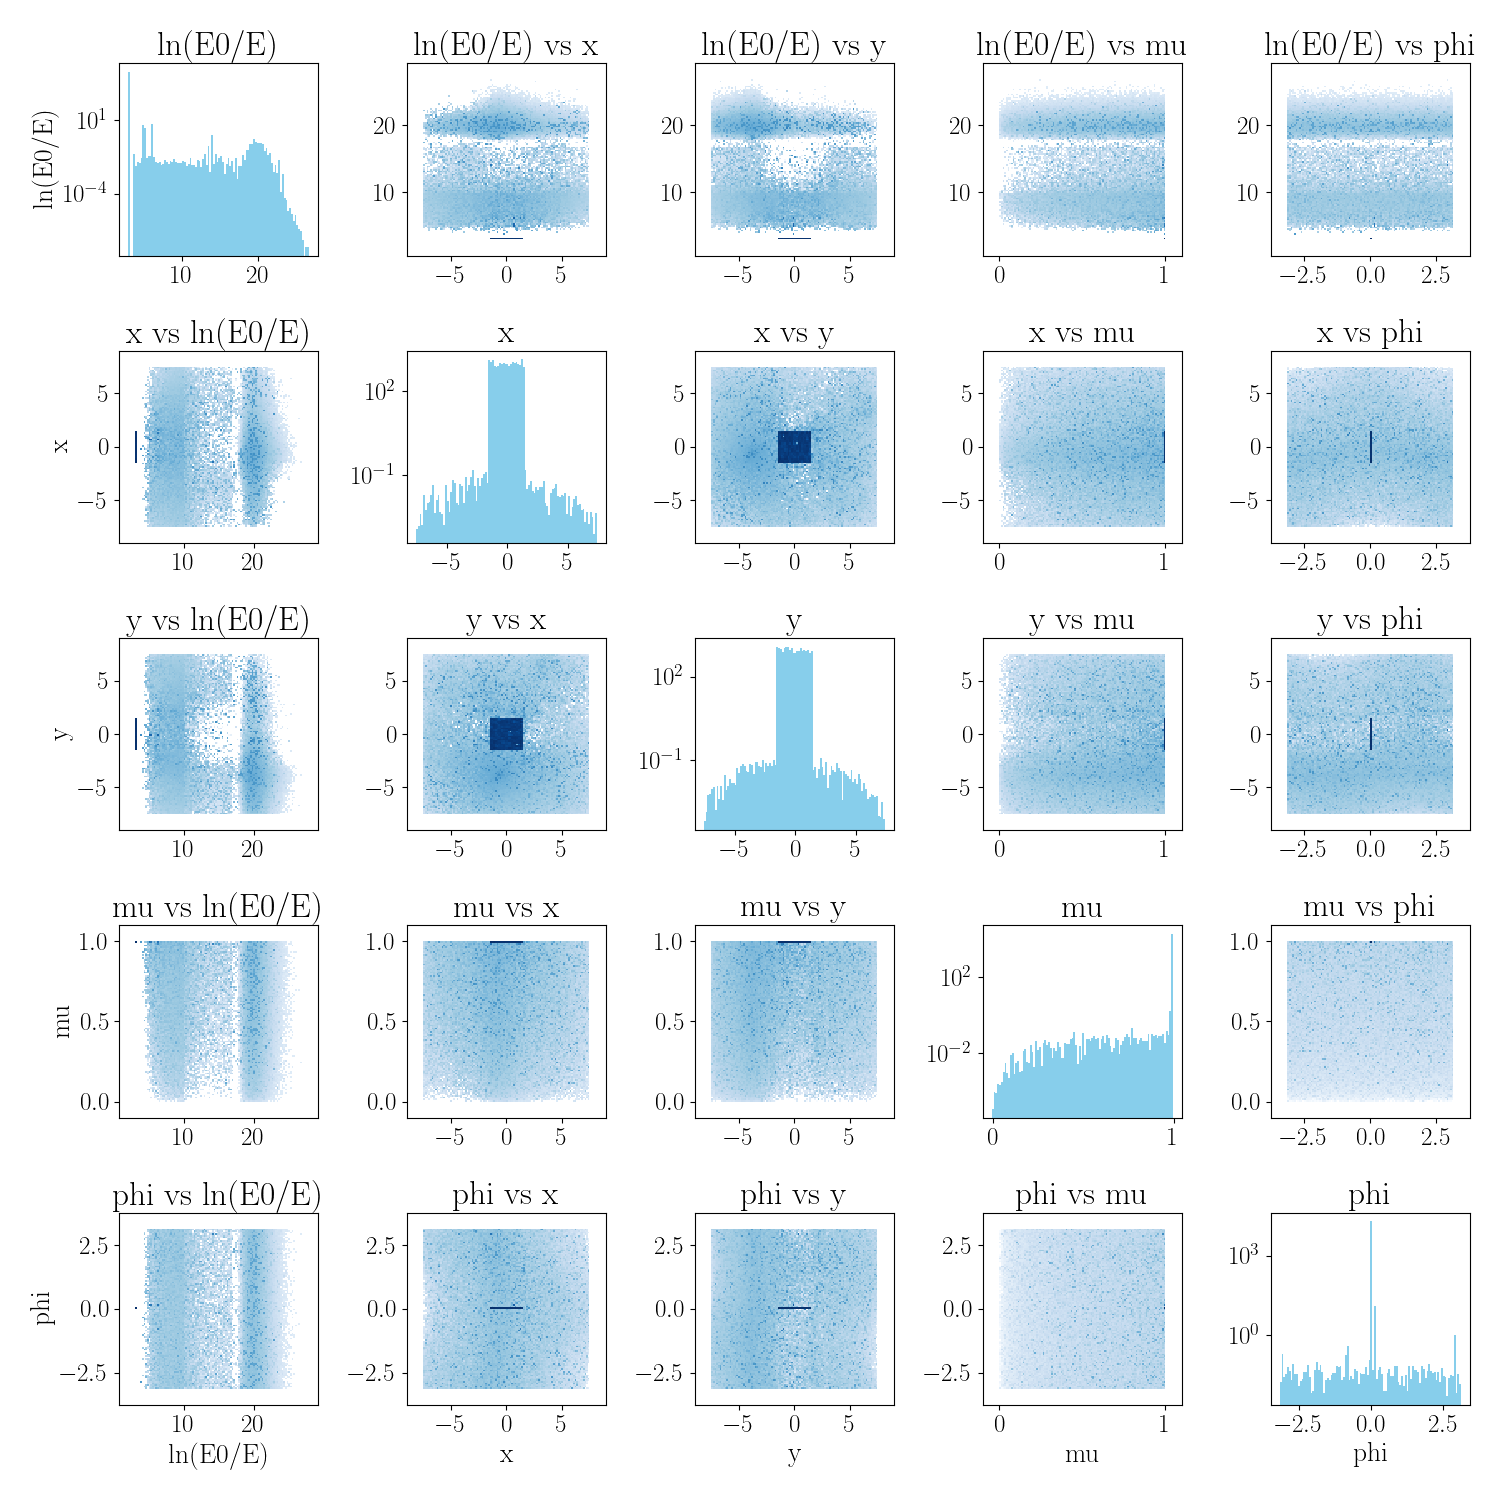

In [8]:
generate_xml(sam_1, sim_1)

In [9]:
resample(path, sam_1)

Geometria: 1.000000, 15.000000, 15.000000, 300.000000, 3.000000, 3.000000
z0: 60.000000
N_original: 20000
fuente_original: /home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_0/trackfile_0_resampled.h5
columns_order: ln(E0/E), x, y, mu, phi
micro_bins: 500, 500, 500, 500, 500
macro_bins: 10, 8, 8, 7
binning_type: equal_bins
used_defined_edges: [2.995732274553991], None, [-1.5, 1.5], [-1.5, 1.5], [0.999999999], None
factor_normalizacion: 0.960332
MCPL: Attempting to compress file trackfile_1_resampled.mcpl with gzip
MCPL: Succesfully compressed file into trackfile_1_resampled.mcpl.gz
Successfully sampled 20000 particles.
Number of particles in file /home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_1/trackfile_1_resampled.mcpl.gz: 20000
100% n, 0% g, 0% e-, 0% e+, 0% p, 
Saving into OpenMC format (HDF5)
Done, saved into /home/lucas/Documents/Proyecto_Integrador/PI/segundo_semestre/3-28-25/sim_1/trackfile_1_resampled.h5 file


/home/lucas/anaconda3/envs/openmc_develop/lib/python3.10/site-packages/kdsource/surfsource.py:422: RuntimeWarning: divide by zero encountered in log10
  df["log(t)"] = np.log10(df["t"].to_numpy())
